# NHTSA Vehicle Crash Test Database
By [@jonkeegan](https://github.com/jonkeegan)

[https://github.com/jonkeegan/nhtsa-vehicle-crash-test-db](https://github.com/jonkeegan/nhtsa-vehicle-crash-test-db)

Some simple analysis of the [NHTSA Vehicle Crash Test databse](https://www.nhtsa.gov/research-data/research-testing-databases#/vehicle) collected on Nov. 23rd, 2022. 

This data was collected my the story ["Vehicle Crash Test Films from the 1980s"](https://www.beautifulpublicdata.com/vehicle-crash-test-films-from-the-1980s/)

The data contains 8,788 rows and 28 columns.



In [56]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import datetime

bar_color = '#008dc4'

In [80]:
# Load the CSV
data = pd.read_csv("all.csv")

In [81]:
# read the column names
data.columns

Index(['testNo', 'multimediaFiles', 'testReferenceNo', 'testType',
       'contractorStudyTitle', 'testPerformer', 'impactAngle',
       'testConfiguration', 'offsetDistance', 'closingSpeed',
       'instrumentationInformation', 'vehicleInformation',
       'barrierInformation', 'documentInformation', 'hasPhotos', 'hasVideos',
       'hasReports', 'hasInstrumentationInfo', 'hasBarrierInformation',
       'hasVehicleInformation', 'vehicleMake', 'vehicleModel', 'modelYear',
       'engineDisplacement', 'vehicleTestWeight', 'vehicleLength',
       'vehicleWidth', 'vaxCrushDistance'],
      dtype='object')

In [83]:
# Number of distinct test numbers. Some tests involved multiple cars. 
len(data.testNo.unique())

8585

In [84]:
# get some counts for the make of the test vehicles
data.value_counts('vehicleMake').tail(50)

vehicleMake
RENAULT           31
GMC               23
PEUGEOT           19
SMART             17
AMERICAN          14
TESLA             13
DAEWOO            12
JAGUAR            11
EAGLE              9
LAND ROVER         9
GENESIS            6
PORSCHE            6
MCI                4
JET                4
CODA               4
SOLECTRIA          4
POLESTAR           3
YUGO               3
HUMMER             3
LECTRA             2
DAIHATSU           2
DELOREAN           2
UM                 2
TIARA              1
CHECKER            1
CHAMPION           1
THOMAS             1
TRIUMPH            1
BRAUN              1
COLLINS            1
VANTAGE            1
BLUE BIRD          1
BATTRONICS         1
WINNEBAGO          1
CHINOOK            1
NOR-CAL            1
COMUTA             1
ODYSSEY            1
ROLLX              1
EEVC               1
RENAISSANCE        1
EL DORADO          1
PREVOST            1
EVA                1
FREEDOM MOTORS     1
HOLDEN             1
IH                 1
L

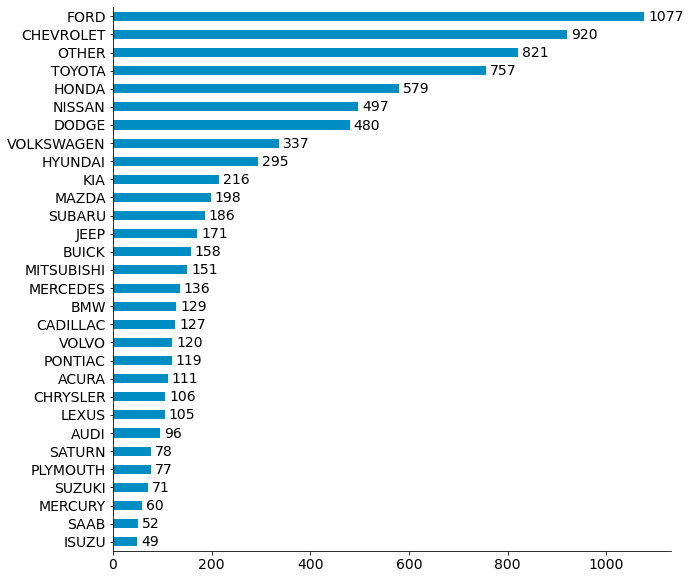

In [85]:
# Make a quick chart of the top 30 vehicle makers 
plt.rcParams.update({'font.size': 14})

car_make_plot = data['vehicleMake'].value_counts().head(30).sort_values().plot(kind='barh', figsize=(10,10), color=bar_color)
for i, v in enumerate(data['vehicleMake'].value_counts().head(30).sort_values()):
    car_make_plot.text(v+8, i-.25, str(v))
car_make_plot.spines['top'].set_visible(False)
car_make_plot.spines['right'].set_visible(False)

In [86]:
# Number of unique vehicle makes
len(data.vehicleMake.unique())

87

In [87]:
# Number of unique models
len(data.vehicleModel.unique())

785

In [88]:
# number of unique car model years
data.modelYear.unique()

array([2022.,   nan, 2021., 2018., 2020., 2019., 2016., 2002., 2017.,
          0., 2015., 2014., 2013., 2012., 2011., 2010., 2007., 1999.,
       2006., 2009., 2005., 2003., 2000., 2008., 2004., 1991., 1992.,
       2001., 1994., 1995., 1996., 1997., 1998., 1993., 1983., 1990.,
       1988., 1986., 1989., 1987., 1985., 1981., 1982., 1975., 1984.,
       1980., 1979., 1977., 1978., 1973., 1976., 1974., 1970., 1972.,
       1971., 1969., 1966., 1965.])

In [98]:
# Filter out the garbage weight values...some zeroes and 99999s in there...
data[(data['vehicleTestWeight'] < 99999) & (data['vehicleTestWeight'] > 0)].vehicleTestWeight.value_counts()

1716.0    121
1361.0     20
1426.0     19
1588.0     18
1599.0     17
         ... 
2684.0      1
3047.0      1
2821.0      1
1938.0      1
1922.0      1
Name: vehicleTestWeight, Length: 1695, dtype: int64

In [99]:
# sort to find the heaviest vehicle
data[(data['vehicleTestWeight'] < 99999) & (data['vehicleTestWeight'] > 0)].sort_values("vehicleTestWeight", ascending=False).head(50)

,testNo,multimediaFiles,testReferenceNo,testType,contractorStudyTitle,testPerformer,impactAngle,testConfiguration,offsetDistance,closingSpeed,...,hasBarrierInformation,hasVehicleInformation,vehicleMake,vehicleModel,modelYear,engineDisplacement,vehicleTestWeight,vehicleLength,vehicleWidth,vaxCrushDistance
3718,6294,https://nrd.api.nhtsa.dot.gov/nhtsa/vehicle/ap...,071214,TEST PROCEDURE DEVELOPMENT,NaN,TRC OF OHIO,0.0,VEHICLE INTO BARRIER,0.0,48.90,...,True,True,MCI,102EL3 MOTORCOACH,2000.0,NOT APPLICABLE,42720.0,0.0,0.0,0.0
2498,7660,https://nrd.api.nhtsa.dot.gov/nhtsa/vehicle/ap...,110824,RESEARCH SAFETY VEHICLE TEST,2011 JEEP GRAND CHEROKEE LEFT SIDE FMVSS 214 P...,TRC OF OHIO,285.0,VEHICLE INTO BARRIER,0.0,32.10,...,True,True,JEEP,GRAND CHEROKEE,2011.0,STRAIGHT 6 INLINE FRONT,23420.0,4825.0,1930.0,377.0
3149,6934,https://nrd.api.nhtsa.dot.gov/nhtsa/vehicle/ap...,6934,FMVSS 208 OCCUPANT CRASH PROTECTION,MCI MOTORCOACH INTO FLAT FRONT BARRIER,OTHER,0.0,VEHICLE INTO BARRIER,0.0,55.84,...,True,True,MCI,102EL3 MOTORCOACH,2000.0,OTHER,20071.0,13844.0,2591.0,0.0
3281,6797,https://nrd.api.nhtsa.dot.gov/nhtsa/vehicle/ap...,BT09072201,OTHER,ECE REGULATION 66 BASED RESEARCH TEST,MGA RESEARCH,0.0,ROLLOVER,0.0,0.00,...,False,True,MCI,102EL3 MOTORCOACH,2000.0,OTHER,18526.0,13620.0,2591.0,0.0
3656,6360,https://nrd.api.nhtsa.dot.gov/nhtsa/vehicle/ap...,PG08030301,OTHER,ECE REGULATION 66 BASED RESEARCH TEST,MGA RESEARCH,0.0,ROLLOVER,0.0,0.00,...,False,True,PREVOST,LEMIRAGE XL,1991.0,NOT APPLICABLE,13449.0,12192.0,2591.0,0.0
3657,6359,https://nrd.api.nhtsa.dot.gov/nhtsa/vehicle/ap...,PG08022601,OTHER,ECE REGULATION 66 BASED RESEARCH TEST,MGA RESEARCH,0.0,ROLLOVER,0.0,0.00,...,False,True,MCI,MC-12,1992.0,NOT APPLICABLE,12806.0,12249.0,2438.0,0.0
6118,3160,https://nrd.api.nhtsa.dot.gov/nhtsa/vehicle/ap...,990525,RESEARCH,HEAVY TRUCK INTO LEFT SIDE OF 1995 BLUE BIRD BUS,TRC OF OHIO,270.0,VEHICLE INTO VEHICLE,99999.0,75.30,...,False,True,BLUE BIRD,CONVENTIONAL,1995.0,STRAIGHT 6 INLINE FRONT,9965.0,99999.0,2340.0,1690.0
6117,3161,https://nrd.api.nhtsa.dot.gov/nhtsa/vehicle/ap...,990421-1,RESEARCH,1997 THOMAS BUILT BUS INTO A FLAT FRONTAL BARRIER,TRC OF OHIO,0.0,VEHICLE INTO BARRIER,99999.0,48.30,...,True,True,THOMAS,CONVENTIONAL,1997.0,V6 INLINE FRONT,8056.0,11250.0,2388.0,206.0
5259,4218,https://nrd.api.nhtsa.dot.gov/nhtsa/vehicle/ap...,S020410,FMVSS 208 OCCUPANT CRASH PROTECTION,VEHICLE SAFETY COMPLIANCE TESTING FOR OCCUPANT...,TRC OF OHIO,0.0,SLED WITH VEHICLE BODY,0.0,46.90,...,False,True,CHEVROLET,AVALANCHE,2002.0,V8 INLINE FRONT,6135.0,5631.0,2027.0,0.0
5215,4283,https://nrd.api.nhtsa.dot.gov/nhtsa/vehicle/ap...,S020503,FMVSS 208 OCCUPANT CRASH PROTECTION,VEHICLE SAFETY COMPLIANCE TESTING FOR OCCUPANT...,TRC OF OHIO,0.0,SLED WITH VEHICLE BODY,0.0,47.90,...,False,True,DODGE,RAM1500,2002.0,V6 TRANSVERSE FRONT,6072.0,5276.0,2029.0,0.0
